In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def preprocess(s, lower=True, strip_punc=True):
    '''
    Input: String, lower(Bool), strip_punc(Bool)
    Output: List of Strings
    '''
    punc = '.-,?<>:;"\'!%'
    if isinstance(s, str):
        s = s.split() # tokenize text
    if lower:
        s = [t.lower() for t in s]
    if strip_punc:
        s = [t.strip(punc) for t in s]
        
    return s

def token_frequency(tokens, tf= None, relative=False):
    """
    Inputs: 
        tokens = List of Strings or None
        tf = dict or None
        relative = Boolean
    Output: 
        Dictionary of a token frequencies
    """
    tf = {} if tf==None else tf
    
    if len(tf) != 0 and relative==True:
        if isinstance(list(tf.items())[0][1], float):
            print('WARNING: Adding raw counts to relative frequency')
            return tf
        
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    
    if relative:
        total = sum([v for k,v in tf.items()])
        tf = {k:v/total for k, v in tf.items()}
          
    return tf


def calc_percent(headlines):
    total = len(headlines)
    count = 0
    for h in headlines:
        if 'coronavirus' in h or 'covid' in h:
            count += 1
    return round(count/total * 100, 2)

def word_counts(headlines):
    """
    Input: a list of headlines from news articles
    Output: full word counts for all words from the articles
    """
    # define empty dict to collect all words
    tf = {}
    
    # preprocess all headlines
    headlines = headlines.apply(lambda x: preprocess(x))
    
    # calc token frequency of all word tokens in headlines
    headlines.apply(lambda x: token_frequency(x,tf=tf))
    
    # sort tokens by frequency 
    sorted_tokens = sorted(tf.items(), key= lambda x:x[1], reverse=True)
    for token in sorted_tokens[:30]:
        print(token)

In [13]:
# read in cnbc articles
df = pd.read_csv('cnbc_news.csv',parse_dates=['publish_date'], index_col='publish_date').reset_index()

# drop any rows with null
df = df.dropna()

# preprocess text in headlines
df['headline'] = df['headline'].apply(lambda x: preprocess(x))
df.tail()

,publish_date,headline
4101,2020-04-22,"[stock, market, live, updates, dow, up, 500, o..."
4102,2020-04-22,"[martin, shkreli, seeks, compassionate, releas..."
4103,2020-04-22,"[two-thirds, of, internships, are, canceled, h..."
4104,2020-04-22,"[investors, pick, tesla, over, gm, toyota, to,..."
4105,2020-04-22,"[coronavirus, live, updates, lockdowns, bring,..."


In [14]:
# calc % of headlines that include the word "coronavirus"
percent_per_day = df.groupby('publish_date')['headline'].apply(lambda x: calc_percent(x))[4:]
print(percent_per_day)

publish_date
2020-03-08    33.33
2020-03-09    43.14
2020-03-10    43.10
2020-03-11    47.83
2020-03-12    50.83
2020-03-13    59.29
2020-03-14    61.90
2020-03-15    53.33
2020-03-16    53.23
2020-03-17    44.36
2020-03-18    44.94
2020-03-19    52.27
2020-03-20    51.30
2020-03-21    69.77
2020-03-22    62.50
2020-03-23    56.20
2020-03-24    51.01
2020-03-25    48.78
2020-03-26    44.74
2020-03-27    54.90
2020-03-28    52.63
2020-03-29    64.71
2020-03-30    50.00
2020-03-31    49.53
2020-04-01    46.59
2020-04-02    42.86
2020-04-03    45.71
2020-04-04    48.57
2020-04-05    51.16
2020-04-06    40.00
2020-04-07    39.83
2020-04-08    38.46
2020-04-09    34.55
2020-04-10    45.45
2020-04-11    50.00
2020-04-12    38.46
2020-04-13    36.56
2020-04-14    42.19
2020-04-15    35.51
2020-04-16    46.75
2020-04-17    37.08
2020-04-18    47.06
2020-04-19    39.13
2020-04-20    26.90
2020-04-21    32.05
2020-04-22    37.50
Name: headline, dtype: float64


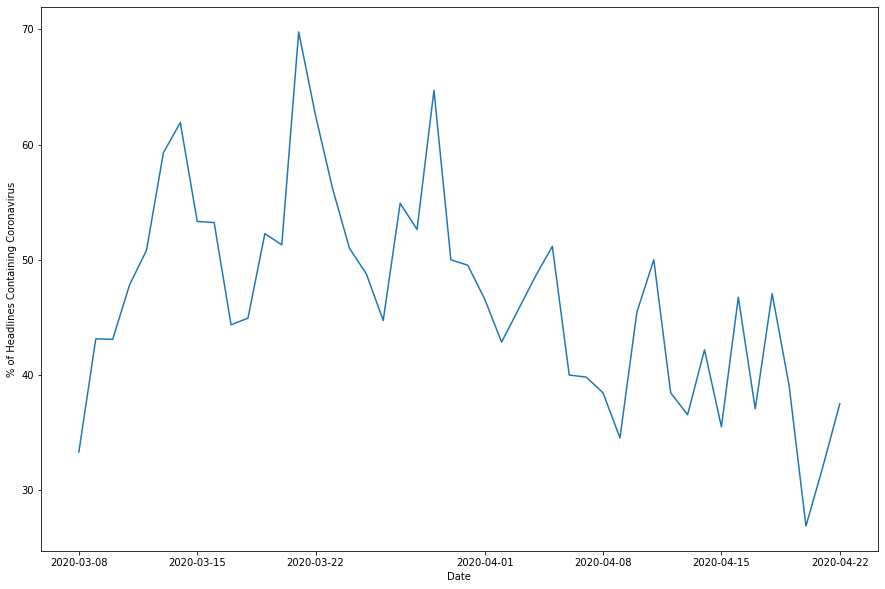

In [15]:
plt.figure(figsize=(15,10))
plt.plot(percent_per_day.index, percent_per_day.values)
plt.xlabel('Date'); plt.ylabel('% of Headlines Containing Coronavirus')
plt.show()

In [16]:
# Show total word counts across all headlines
word_counts(df['headline'])

('coronavirus', 1882)
('to', 1840)
('the', 1326)
('in', 811)
('for', 746)
('and', 688)
('of', 674)
('as', 659)
('says', 658)
('a', 602)
('is', 454)
('on', 402)
('new', 353)
('us', 353)
('market', 344)
('stocks', 315)
('more', 306)
('are', 305)
('live', 304)
('trump', 273)
('updates', 268)
('after', 267)
('stock', 264)
('with', 256)
('will', 256)
('from', 252)
('dow', 237)
('pandemic', 199)
('up', 194)
('could', 176)
